Importing all the packages that will be necessary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob


Combining all the item's csv files in one dataframe

In [3]:
owd = os.getcwd() #saving in a variable the original directory

os.chdir("data\item") #accessing the directory from the item's files
extension = 'csv' #extension of the files
all_filenames_item = [i for i in glob.glob('*.{}'.format(extension))] #transforming in a list all the filenames from the directory
combined_item = pd.concat([pd.read_csv(f) for f in all_filenames_item ]) #combine all files in the list



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (19,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (8,19,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (8,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  


Combining all the licitacao's csv files in one dataframe

In [4]:
os.chdir(owd) #returning to the original directory
os.chdir("data\licitacao") #accessing the directory from the item's files
extension = 'csv' #extension of the files
all_filenames_licit = [i for i in glob.glob('*.{}'.format(extension))] #transforming in a list all the filenames from the directory
combined_licit = pd.concat([pd.read_csv(f) for f in all_filenames_licit ]) #combine all files in the list



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (52,54) have mixed types.Specify dtype option on import or set low_memory=False.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  """


In [5]:
combined_licit.head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,84100,PM DE ESPERANÇA DO SUL,1.0,2016,CNV,12.0,2016.0,P,001,2016.0,...,NaN,NaN,J,6233397000148.0,6420.0,S,NaN,NaN,NaN,N
1,84100,PM DE ESPERANÇA DO SUL,4.0,2016,CNV,12.0,2016.0,P,003,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,82701,CM DE XANGRI-LÁ,1.0,2016,PRP,12.0,2016.0,G,01,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,6.0,2016,CNV,12.0,2016.0,P,005,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
4,63900,PM DE COTIPORÃ,36.0,2016,PRD,NaN,NaN,NaN,344,2016.0,...,J,9255424000171.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N


### The first thing I want to do here is to cross the tables by the NR_LICITACAO, ANO_LICITACAO and CD_TIPO_MODALIDADE, because they are unique values that can't be repeated. So I filtered them first and, later, I cross the tables the get only the items that matches with the values from those columns

Filtering only the relevant columns and values for the test (advice from the enterprise)

In [6]:
combined_licit = combined_licit.loc[combined_licit['TP_OBJETO'] == "COM"]

combined_licit = combined_licit[['NR_LICITACAO','ANO_LICITACAO', 'CD_TIPO_MODALIDADE','DS_OBJETO', 'TP_OBJETO']] # filtering only the relevant columns (advice from the company)
combined_item = combined_item[['NR_LICITACAO','ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_LOTE', 'NR_ITEM_ORIGINAL','DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']] # filtering only the relevant columns (advice from the company)

Now I will remove (if it exists) duplicates from combined_licit, becase, as the public organ from RS says:

***Informações relacionadas aos processos licitatórios sendo realizados.
Não podem ser informados, para um mesmo arquivo de leiaute, dois ou mais
registros com a mesma combinação de valores dos campos formadores da chave do
registro. A chave deste registro é: NR_LICITACAO, ANO_LICITACAO e
CD_TIPO_MODALIDADE.***

So I dropped those that have these fields duplicated




In [7]:
combined_licit.drop_duplicates(subset=['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'], inplace=True)

In [8]:
combined_licit.reset_index(inplace=True, drop=True) #reseting index

In [9]:
combined_licit.head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,DS_OBJETO,TP_OBJETO
0,4.0,2016,CNV,Aquisição de merenda escolar,COM
1,1.0,2016,PRP,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,COM
2,6.0,2016,CNV,Aquisição de materiais de limpeza para as dive...,COM
3,3.0,2016,PRP,Aquisição de tubos de concreto,COM
4,6.0,2016,PRP,Aquisição de módulos de comunicação de dados ...,COM


Now I will remove (if it exists) duplicates from combined_item, becase, as the public organ from RS says:

***Não podem ser informados, para um mesmo arquivo de leiaute, dois ou mais
registros com a mesma combinação de valores dos campos formadores da chave do registro. A chave deste registro é: NR_LICITACAO, ANO_LICITACAO,
CD_TIPO_MODALIDADE, NR_LOTE e NR_ITEM.***

So I dropped those that have these fields duplicated



In [10]:
combined_item.drop_duplicates(subset=['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_LOTE', 'NR_ITEM_ORIGINAL'], inplace=True)

In [11]:
combined_item.reset_index(inplace=True, drop=True) #reseting index

In [12]:
combined_item.head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM_ORIGINAL,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,15.0,2016,PRP,1,2,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",1430.0
1,15.0,2016,PRP,1,4,"Pneu 12.4x24 garra baixa, 10 lonas",1258.0
2,15.0,2016,PRP,1,7,Pneu 1400x24 mínimo 12 lonas,1998.0
3,15.0,2016,PRP,1,8,"Pneu 17.5x25 12 lonas, capacidade mínima de ca...",2978.0
4,15.0,2016,PRP,1,12,"Pneu 18.4x30 garra baixa, mínimo 10 lonas",2500.0


In [13]:
print("Shape from licitacao's dataframe: " + str(np.shape(combined_licit)))
print("Shape from item's dataframe: " + str(np.shape(combined_item)))

Shape from licitacao's dataframe: (13362, 5)
Shape from item's dataframe: (1616670, 7)


## Now we have both dataframes filtered. I would like to merge them, but I will not because of memory usage from my computer, which is a limitation for me.

As the field 'DS_ITEM' doesn't have a pattern of writting, we will just check how many unique values this has:

In [14]:
len(combined_item['DS_ITEM'].unique())

958792

But, first, lets check if has some fields that have some pattern, just to have sure:

In [15]:
combined_item['DS_ITEM'].value_counts()[:10]

SERVIÇO                      1658
LIVRO                        1142
MATERIAL                      900
MANGUEIRA SILICONE 2.1/2"     827
FILTRO                        669
PNEU                          599
SERVIÇOS GERAIS               567
CENOURA                       554
BETERRABA                     538
VALE TRANSPORTE               526
Name: DS_ITEM, dtype: int64

That's it! So we can realize that some fields have some patterns to be written, e some other, does not. \

So we can see that the most bought item is "Serviço", the second, "Livro", the third, "Material" and etc. But let's see that in a histogram. I will plot just the top 30 most common items. But why the top 30? Because we have too much data, and I think with the top 30 we can have a good view of what's happening.

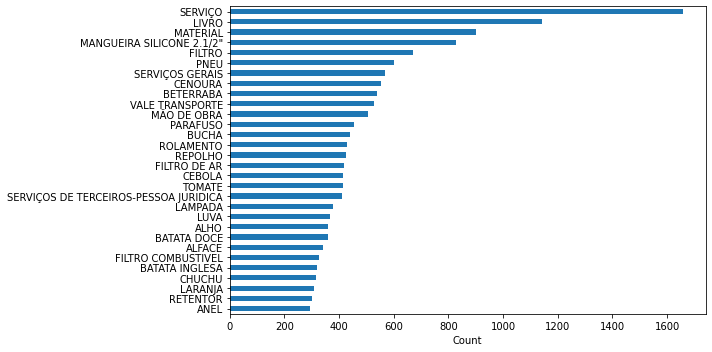

In [16]:
top = 30
from matplotlib.pyplot import figure

figure(figsize=(10, 5))
combined_item['DS_ITEM'].value_counts()[:top].sort_values().plot.barh()
plt.xlabel("Count")
plt.tight_layout()


Ok, now we have the top 30 items that was bought. We can see that has some car stuffs and some foods. But, mostly, we have more service items. But lets divide this by year: lets see the most common item bought divided by the year

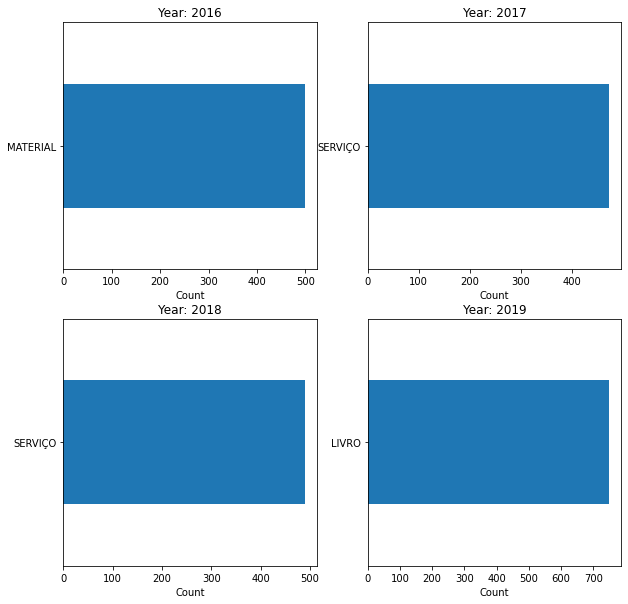

In [17]:
top = 1
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
plot = 1
for i in ([2016, 2017, 2018, 2019]):
  plt.subplot(2,2,plot)
  plt.title("Year: " + str(i))
  combined_item['DS_ITEM'][combined_item['ANO_LICITACAO'] == i].value_counts()[:top].sort_values().plot.barh()
  plt.xlabel('Count')
  plot+=1

Now we can see that services wasn't all the time the most common bought item. We can see that in 2016 it was materials, and in 2019 was Livro the most common. But lets analyse how much was SPENT with these items. Because Serviço can be the most frequent, but not necessarily is the one that was most spent with it. \
Lets analyse first with all the data, with all the 4 years.

In [18]:
items = combined_item['DS_ITEM'].value_counts()[:10].keys() # save the top items

most_freq_items = combined_item[combined_item['DS_ITEM'].isin(items)] #filtering the dataframe only with the top-10 most frequent items

Text(0.5, 0, 'Spent (R$)')

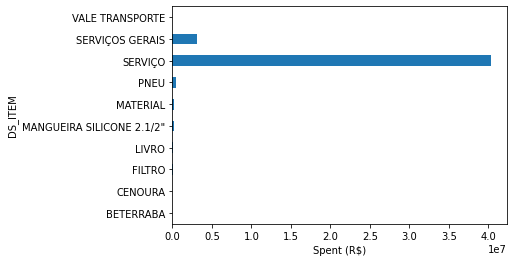

In [19]:
most_freq_items.groupby('DS_ITEM').sum()['VL_UNITARIO_HOMOLOGADO'].plot.barh()
plt.xlabel("Spent (R$)")

Ok, serviço is, by far, the item that was the most spent with.

Lets analyse this divider by year. That's it: how much was spent with the most frequent item by year?

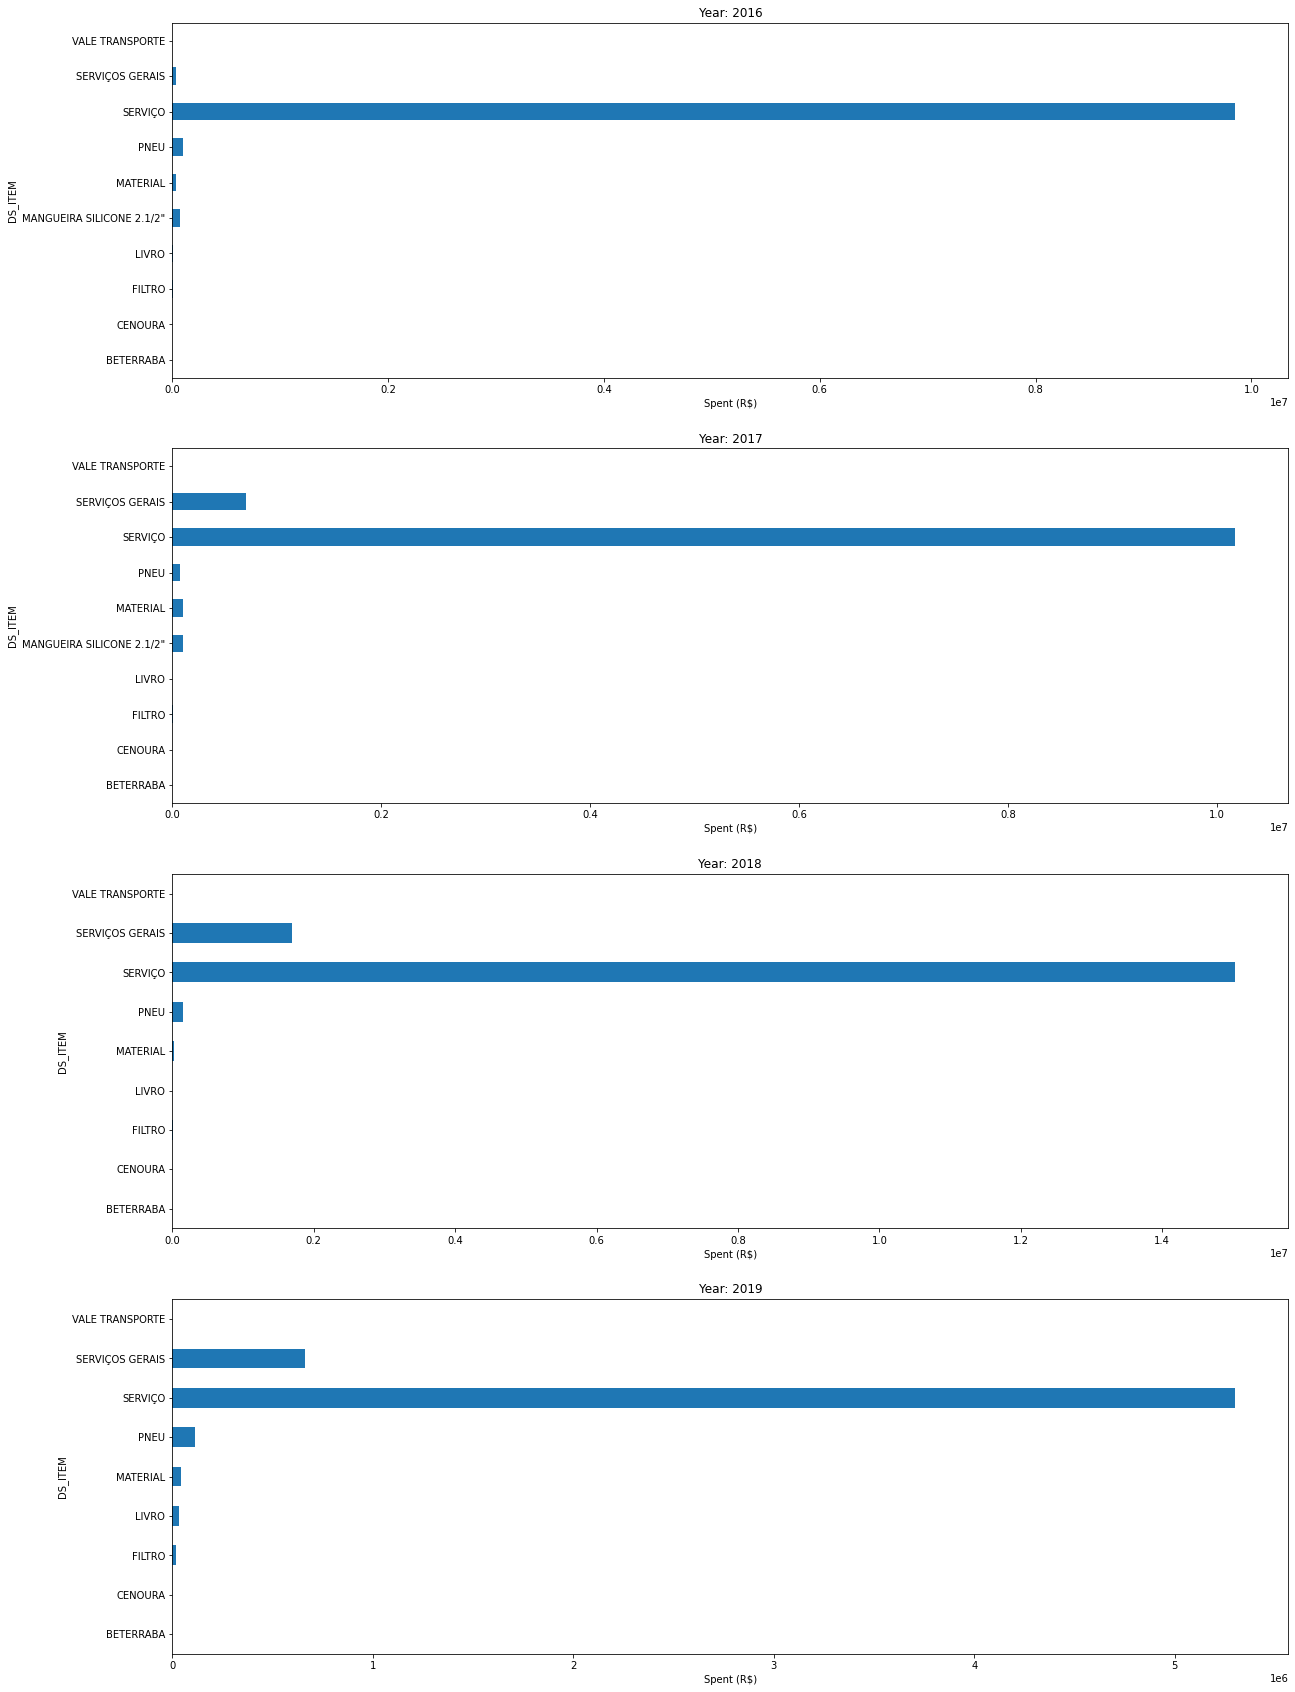

In [28]:
top = 1
from matplotlib.pyplot import figure
figure(figsize=(20, 30))
plot = 1
for i in ([2016, 2017, 2018, 2019]):
  plt.subplot(4,1,plot)
  plt.title("Year: " + str(i))
  most_freq_items[most_freq_items['ANO_LICITACAO'] == i].groupby('DS_ITEM').sum()['VL_UNITARIO_HOMOLOGADO'].plot.barh()
  plt.xlabel("Spent (R$)")  
  plot+=1

All the years Serviço was the one that was most spent with it. So, even if he wasn't the most frequent in each year, he is the most that was spent with it.

Let's now check in the combined_licit dataframe what are those services, seeing the columns that specifies what are these licitations.

In [22]:
service_items = most_freq_items[most_freq_items['DS_ITEM'] == 'SERVIÇO'] # filtering only the serviços values
service_items.head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM_ORIGINAL,DS_ITEM,VL_UNITARIO_HOMOLOGADO
15793,22.0,2016,PRP,1,6124,SERVIÇO,34711.41
33406,22.0,2016,PRP,1,6123,SERVIÇO,28260.30
37221,25.0,2016,PRP,1,6136,SERVIÇO,48600.00
40543,29.0,2016,PRP,1,19880,SERVIÇO,15500.00
72282,4.0,2016,TMP,1,5938,SERVIÇO,12830.95


here I am filtering in combined_licit only those fields that match with 'NR_LICITACAO',	'ANO_LICITACAO' and	'CD_TIPO_MODALIDADE' from service_items


In [30]:
merge_servico_licit = pd.merge(service_items, combined_licit, on=['NR_LICITACAO',	'ANO_LICITACAO',	'CD_TIPO_MODALIDADE'], how='inner')

merge_servico_licit.head()


,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM_ORIGINAL,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO,TP_OBJETO
0,22.0,2016,PRP,1,6124,SERVIÇO,34711.41,Aquisição de 60 t (sessenta toneladas) de Clor...,COM
1,22.0,2016,PRP,1,6123,SERVIÇO,28260.30,Aquisição de 60 t (sessenta toneladas) de Clor...,COM
2,22.0,2016,PRP,1,6125,SERVIÇO,NaN,Aquisição de 60 t (sessenta toneladas) de Clor...,COM
3,25.0,2016,PRP,1,6136,SERVIÇO,48600.00,Aquisição de 90 t (noventa toneladas) de Cloro...,COM
4,29.0,2016,PRP,1,19880,SERVIÇO,15500.00,Aquisição de lacres antifraude para extremidad...,COM


In [36]:
merge_servico_licit['DS_OBJETO'].value_counts()

CONTRATAÇÃO DE HORAS MECÂNICAS PARA MANUTENÇÃO, RECUPERAÇÃO, AVALIAÇÃO, IDENTIFICAÇÃO E SUBSTITUIÇÃO DE PEÇAS NOS VEÍCULOS DA SMOV, SME, SMUTS E SMADR. O  PROCESSO LICITATÓRIO É EXCLUSIVO ÀS EMPRESAS  BENEFICIÁRIAS DA LC Nº 123/2006.                                                                                                      45
Aquisição de alimentos não perecíveis.                                                                                                                                                                                                                                                                                                         45
Aquisição de equipamento visando atender as necessidades das Salas multifuncionais das escolas da rede municipal, para atendimento de crianças com necessidades educacionais especiais, por dispensa de licitação, tendo em vista a empresa possuir exclusividade dos produtos oferecidos, para Secretaria Municipal de Educação e C

Here we can see what are these "Serviço" items. Mostly, are related to hiring hours in auto mechanics, or about a aquisition of some stuffs (aliments, equipaments, vehicles and etc). \

Here we can conclude some patterns observed: Serviço is, in the four years, the most frequent bought item, but not every year, in 2016 was material and in 2019 was livro. But, if we plot the histogram to analyse how much was spent with the items, serviço in all the years was the item that was most spent with it. So he forms part of most of the state's annual budget. \
These services have to do with spending on car maintenance, purchases of some products, contracts with companies, etc.


Lets analyze now how much percent the Serviço represents from the state's budget. I expect that can be a high percentage. 


In [48]:
servico_sum = combined_item['VL_UNITARIO_HOMOLOGADO'][combined_item['DS_ITEM'] == 'SERVIÇO'].sum()
total_sum = combined_item['VL_UNITARIO_HOMOLOGADO'].sum()

pct_servico = (servico_sum/total_sum)*100
print('In 4 years, the state spent with licitations R$ ' + str(np.round(total_sum)))
print(' -------------------------------------------------------- ')
print('R$ ' + str(np.round(servico_sum)) + ' was with serviço item')
print(' -------------------------------------------------------- ')
print('Serviço represents ' + str(np.round(pct_servico)) + '% of the total budget spent')

In 4 years, the state spent with licitations R$ 3618477301.0
 -------------------------------------------------------- 
R$ 40359705.0 was with serviço item
 -------------------------------------------------------- 
Serviço represents 1.0% of the total budget spent


The result is not what I was expecting, but, after think a little, makes sense. \
So we can see here that, even if Serviço is the item that was most spent with it, it represents only 1% of the total budget spent, because we have too many items that was bought by the public organs that represent even less than 1%, obviously.d